In [40]:
import rootplotlib as rpl
from ROOT import kRed, kAzure, kYellow, kBlack, kBlue
rpl.set_atlas_style()
rpl.supress_root_warnings()
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


Applying ATLAS style settings...
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


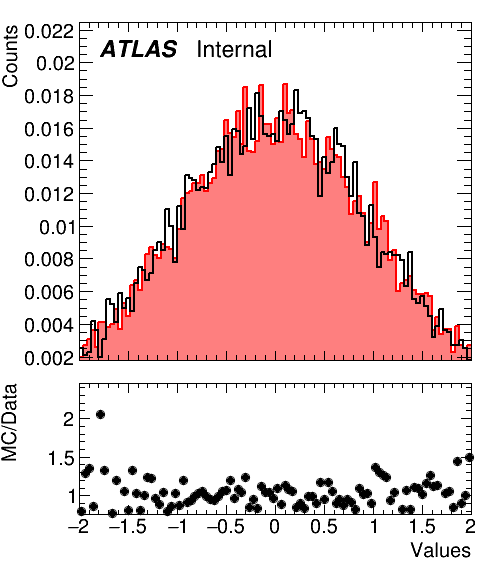

In [42]:
fig = rpl.create_ratio_canvas('my_canvas')

h_mc   = rpl.hist1d( 'h1', 100, -2, 2 )
h_mc.FillRandom('gaus',10000);
h_data = rpl.hist1d( 'h2', 100, -2, 2 )
h_data.FillRandom('gaus',10000);


d_mc = rpl.density( h_mc )
d_data = rpl.density( h_data )
d_ratio = rpl.divide( h_mc, h_data )

d_mc.SetFillColor( rpl.get_color( kRed, 0.5 ) )
d_mc.SetLineColor( kRed )
d_data.SetLineColor( kBlack )

rpl.add_hist( d_mc,'same', pad='pad_top' )
rpl.add_hist( d_data ,'same', pad='pad_top' )
rpl.add_hist( d_ratio ,'p1', pad='pad_bot' )
rpl.set_xlabel('Values', pad='pad_bot')
rpl.set_ylabel('Counts', pad='pad_top')
rpl.set_ylabel('MC/Data', pad='pad_bot')
rpl.set_atlas_label(0.2,0.90,'Internal')
rpl.format_ratio_canvas_axes( YTitleOffset=2.3)
rpl.fix_yaxis_ranges( pad='pad_top', ignore_zeros=True, ignore_errors=True, ymaxf=1.2)
rpl.fix_yaxis_ranges( pad='pad_bot', ignore_zeros=True, ignore_errors=True, ymaxf=1.2, yminf=1.2)
fig.show()
#fig.saveas('my_fig.pdf')